Data Exploration: Load and visualize the data.

Use pandas to load the dataset and examine the first few rows.
Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


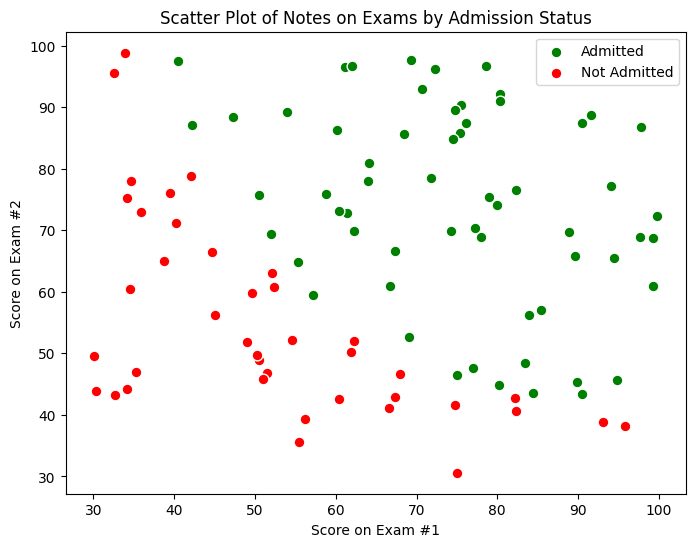

In [5]:
import pandas as pd

df = pd.read_csv('ex2data1.txt', header= None)
print(df.head())

import matplotlib.pyplot as plt

# Separate admitted and not admitted for coloring
admitted = df[df[2] == 1]
not_admitted = df[df[2] == 0]

plt.figure(figsize=(8,6))
plt.scatter(admitted[0], admitted[1], c='green', label='Admitted', edgecolors='w', s=60)
plt.scatter(not_admitted[0], not_admitted[1], c='red', label='Not Admitted', edgecolors='w', s=60)

plt.xlabel('Score on Exam #1')
plt.ylabel('Score on Exam #2')
plt.title('Scatter Plot of Notes on Exams by Admission Status')
plt.legend()
plt.show()


Applying Logistic Regression with scikit-learn:

Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
Train the logistic regression model on your dataset.

In [8]:
#For logistic regression, standardizing data is necessary, not for the other two.

numerical_data = [0, 1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_data] = scaler.fit_transform(df[numerical_data])
print(df.head())

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming numerical features are already scaled and categorical features encoded
X = df.drop(2, axis=1)
y = df[2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)



          0         1  2
0 -1.602248  0.638341  0
1 -1.826256 -1.207541  0
2 -1.539040  0.361294  0
3 -0.282101  1.086368  1
4  0.691528  0.493378  1


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Making Predictions:

Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.

In [11]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


Model Evaluation:

Interpret the result of logistic regression and the accuracy of your model.

In [ ]:
#Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
#Both features have positive effects on the probability of admission.
#Feature 0 has the strongest effect: for each unit increase in its standardized value, the odds of admission increase by over 10 times.
#Feature 1 also contributes positively but slightly less strongly.”

Intercept: [0.84571053]
Coefficients: [[2.36360137 1.90463909]]


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)

#The logistic regression model achieved an accuracy of 80%, with a precision of 90%, recall of 75%, and F1-score of 0.82.
#This indicates that the model makes very few false positive admission predictions and correctly identifies most students who should be admitted.
#However, it misses some qualified students (false negatives).
#The coefficients show that both features positively influence the probability of admission, with Feature 0 having the stronger effect.


Confusion Matrix:
 [[7 1]
 [3 9]]
{'Precision': 0.9, 'Recall': 0.75, 'F1-score': 0.8181818181818182}


[0.29495641 0.02782568 0.00393499 0.26293898 0.04575475]


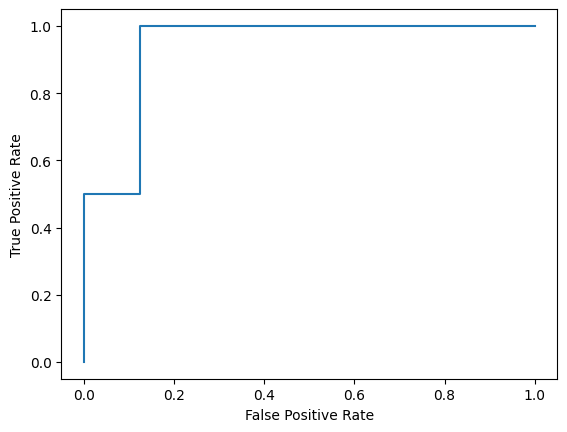

In [25]:
#Probability Predictions
probs = model.predict_proba(X_test)[::,1]
print(probs[:5])  # show first 5 probabilities

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, probs)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
